In [400]:
# import packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
from scipy.stats import stats
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [401]:
crop=pd.read_csv(r"C:\Users\Neel\Desktop\PWS1\Stats\Untitled Folder\annova\crop.data.csv")
inp0=crop.copy()
inp0.head()

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [402]:
inp0.shape

(96, 4)

In [403]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   density     96 non-null     int64  
 1   block       96 non-null     int64  
 2   fertilizer  96 non-null     int64  
 3   yield       96 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 3.1 KB


In [404]:
inp0.describe()

,density,block,fertilizer,yield
count,96.000000,96.000000,96.000000,96.000000
mean,1.500000,2.500000,2.000000,177.015476
std,0.502625,1.123903,0.820783,0.664548
min,1.000000,1.000000,1.000000,175.360840
25%,1.000000,1.750000,1.000000,176.468696
50%,1.500000,2.500000,2.000000,177.058105
75%,2.000000,3.250000,3.000000,177.398571
max,2.000000,4.000000,3.000000,179.060899


In [405]:
for i in iter(inp0):
    print(i)
    print("_______________________________________________________________________")
    print(inp0[i].value_counts())

density
_______________________________________________________________________
1    48
2    48
Name: density, dtype: int64
block
_______________________________________________________________________
1    24
2    24
3    24
4    24
Name: block, dtype: int64
fertilizer
_______________________________________________________________________
1    32
2    32
3    32
Name: fertilizer, dtype: int64
yield
_______________________________________________________________________
177.228692    1
177.550041    1
176.405410    1
178.286042    1
177.032710    1
             ..
177.276996    1
175.360840    1
177.164937    1
175.938533    1
177.118176    1
Name: yield, Length: 96, dtype: int64


In [406]:
inp0["yield"].nunique()

96

<AxesSubplot:xlabel='yield'>

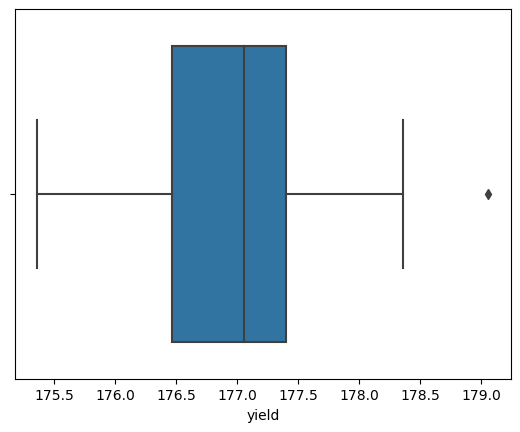

In [407]:
# ANALYSIS

sns.boxplot(inp0['yield'])

In [408]:
#remove the outlier

def mask_outlier(col):
    upper_bound = inp0[col].quantile(.75) +3*1.5
    lower_bound = inp0[col].quantile(.25) -3*1.5
    return np.where(inp0[col]>upper_bound, inp0[col].median(), (np.where(inp0[col]<lower_bound, inp0[col].median(), inp0[col])))

inp0['yield']=mask_outlier("yield")


#Creation of yield flag
inp0['y_flag']=pd.cut(inp0['yield'],  4,labels=('very_good', "good", "moderate", "low"))    

<AxesSubplot:xlabel='yield'>

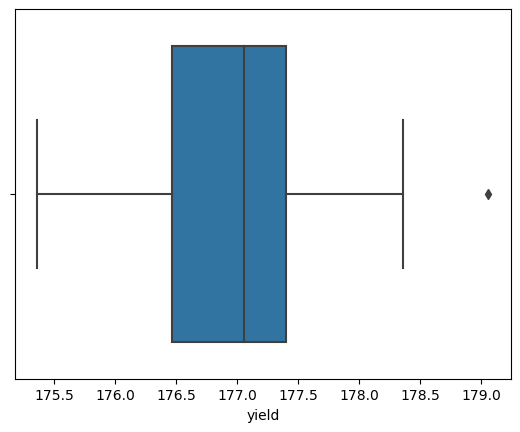

In [409]:
sns.boxplot(inp0['yield'])

<AxesSubplot:xlabel='y_flag', ylabel='density'>

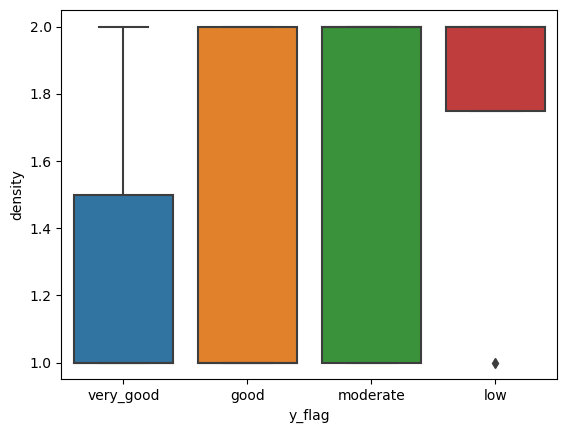

In [410]:
sns.boxplot(data=inp0, y="density", x="y_flag")

<AxesSubplot:xlabel='y_flag', ylabel='fertilizer'>

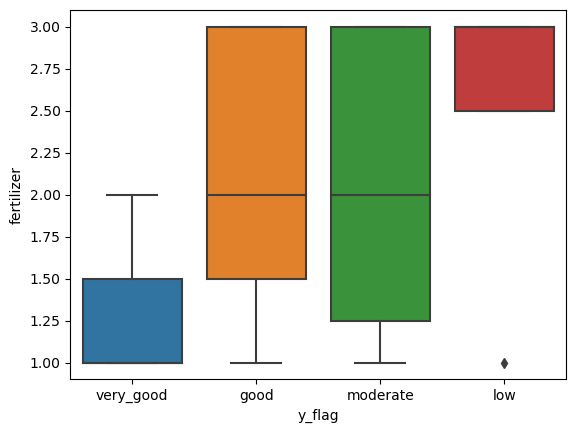

In [411]:
sns.boxplot(data=inp0, y="fertilizer", x="y_flag")

<AxesSubplot:xlabel='y_flag', ylabel='block'>

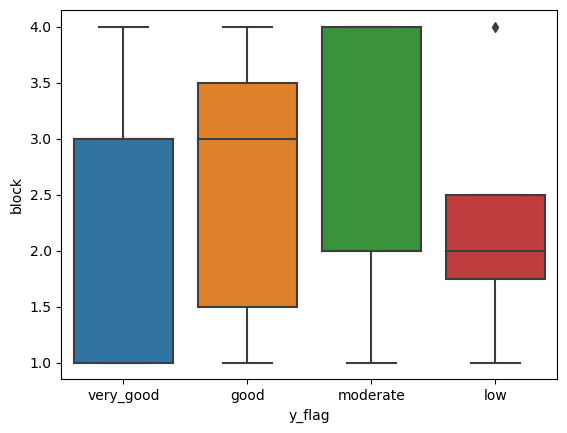

In [412]:
sns.boxplot(data=inp0, y="block", x="y_flag")

In [413]:
inp0.head()

,density,block,fertilizer,yield,y_flag
0,1,1,1,177.228692,moderate
1,2,2,1,177.550041,moderate
2,1,3,1,176.408462,good
3,2,4,1,177.703625,moderate
4,1,1,1,177.125486,good


# One way Annova among Dencity and Yeild

## Dencity

In [414]:
den_df= inp0[["density", "y_flag"]]

In [415]:
den_df.head()

,density,y_flag
0,1,moderate
1,2,moderate
2,1,good
3,2,moderate
4,1,good


# Hypothesis:

### H0: There is no changes in the mean of density across the yeild 
### H1: There is atleast one group's density mean is not same 

In [416]:
mod=ols("density~y_flag", data=den_df).fit()

In [417]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.261
Date:                Mon, 20 Mar 2023   Prob (F-statistic):             0.0866
Time:                        22:35:07   Log-Likelihood:                -66.262
No. Observations:                  96   AIC:                             140.5
Df Residuals:                      92   BIC:                             150.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2667      0.127      9.953      0.000       1.014       1.519
y_flag[T.good]         0.2014      0.146      1.378      0.172      -0.089       0.492
y_flag[T.moderate]     0.3667      0.156      2.352      0.021       0.057       0.676
y_flag[T.low]          0.4833      0.277      1.743      0.085      -0.068       1.034
==============================================================================
Omnibus:                     1406.721   Durbin-Watson:                   3.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.959
Skew:                          -0.011   Prob(JB):                      0.00253
Kurtosis:                       1.271   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [418]:
aov_table= sm.stats.anova_lm(mod,type=2 )

In [419]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
y_flag,3.0,1.647872,0.549291,2.260847,0.086584
Residual,92.0,22.352128,0.242958,NaN,NaN


In [420]:
# We can not reject the null hypothesis as the P vale more than 0.05 
# So Mean of all group in the term of density are same

# checking pair diffrent level p values

In [421]:
pair_t=mod.t_test_pairwise('y_flag')

In [422]:
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
good-very_good,0.201418,0.146173,1.377947,0.171562,-0.088894,0.491730,0.489655,False
moderate-very_good,0.366667,0.155871,2.352372,0.020786,0.057093,0.676240,0.118413,False
low-very_good,0.483333,0.277375,1.742529,0.084757,-0.067557,1.034223,0.357784,False
moderate-good,0.165248,0.115186,1.434615,0.154787,-0.063522,0.394018,0.489655,False
low-good,0.281915,0.256727,1.098111,0.275022,-0.227967,0.791797,0.489655,False
low-moderate,0.116667,0.262370,0.444664,0.657607,-0.404423,0.637756,0.657607,False


In [423]:
# checking one way annova with block
mod0= ols("block~y_flag", data=inp0).fit()

In [424]:
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  block   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2182
Date:                Mon, 20 Mar 2023   Prob (F-statistic):              0.884
Time:                        22:35:08   Log-Likelihood:                -146.59
No. Observations:                  96   AIC:                             301.2
Df Residuals:                      92   BIC:                             311.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.3333      0.294      7.941      0.000       1.750       2.917
y_flag[T.good]         0.1986      0.337      0.588      0.558      -0.472       0.869
y_flag[T.moderate]     0.2333      0.360      0.648      0.518      -0.481       0.948
y_flag[T.low]         -0.0833      0.640     -0.130      0.897      -1.355       1.189
==============================================================================
Omnibus:                       70.086   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.375
Skew:                          -0.006   Prob(JB):                       0.0250
Kurtosis:                       1.642   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [425]:
av=sm.stats.anova_lm(mod0, type=2)

In [426]:
av

,df,sum_sq,mean_sq,F,PR(>F)
y_flag,3.0,0.847872,0.282624,0.21822,0.883531
Residual,92.0,119.152128,1.295132,NaN,NaN


In [427]:
pair_t= mod0.t_test_pairwise('y_flag')

In [428]:
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
good-very_good,0.198582,0.337488,0.588411,0.557698,-0.471699,0.868862,0.987517,False
moderate-very_good,0.233333,0.359879,0.648365,0.518364,-0.481418,0.948085,0.987517,False
low-very_good,-0.083333,0.640410,-0.130125,0.896752,-1.355243,1.188576,0.989250,False
moderate-good,0.034752,0.265946,0.130672,0.896320,-0.493439,0.562943,0.989250,False
low-good,-0.281915,0.592739,-0.475614,0.635477,-1.459145,0.895315,0.987517,False
low-moderate,-0.316667,0.605767,-0.522753,0.602403,-1.519773,0.886439,0.987517,False


In [429]:
# For block also all the level are having p value more than 0.05 so we cant reject the null

In [430]:
# one way test with fertilizer

mod2= ols("fertilizer~y_flag", data=inp0).fit()

In [431]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fertilizer   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.842
Date:                Mon, 20 Mar 2023   Prob (F-statistic):            0.00107
Time:                        22:35:10   Log-Likelihood:                -108.39
No. Observations:                  96   AIC:                             224.8
Df Residuals:                      92   BIC:                             235.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2667      0.197      6.418      0.000       0.875       1.659
y_flag[T.good]         0.8184      0.227      3.610      0.000       0.368       1.269
y_flag[T.moderate]     0.9000      0.242      3.723      0.000       0.420       1.380
y_flag[T.low]          1.2333      0.430      2.867      0.005       0.379       2.088
==============================================================================
Omnibus:                       27.403   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.356
Skew:                          -0.247   Prob(JB):                       0.0417
Kurtosis:                       1.840   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [432]:
pair_t_fer=mod2.t_test_pairwise('y_flag')

In [433]:
sm.stats.anova_lm(mod2, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
y_flag,3.0,10.240426,3.413475,5.841559,0.001068
Residual,92.0,53.759574,0.584343,NaN,NaN


In [434]:
# post hoce pairwise test
pair_t_fer.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
good-very_good,0.818440,0.226692,3.610368,0.000498,0.368211,1.268669,0.002485,True
moderate-very_good,0.900000,0.241732,3.723133,0.000339,0.419900,1.380100,0.002031,True
low-very_good,1.233333,0.430165,2.867116,0.005135,0.378988,2.087678,0.020383,True
moderate-good,0.081560,0.178636,0.456572,0.649055,-0.273227,0.436347,0.657521,False
low-good,0.414894,0.398144,1.042069,0.300110,-0.375855,1.205642,0.657162,False
low-moderate,0.333333,0.406895,0.819211,0.414783,-0.474796,1.141463,0.657521,False


In [435]:
# for fertilizer we can see the mean is not same for each level

# Pingouin easy method 
https://pingouin-stats.org/build/html/index.html
    

In [436]:
import pingouin as pg

In [437]:
pg_anova=pg.anova(dv="fertilizer", between="y_flag", data=inp0, detailed=True)
pg_anova

,Source,SS,DF,MS,F,p-unc,np2
0,y_flag,10.240426,3,3.413475,5.841559,0.001068,0.160007
1,Within,53.759574,92,0.584343,NaN,NaN,NaN


In [438]:
# pairwise

pg.pairwise_tukey(dv="fertilizer", between="y_flag", data=inp0)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,very_good,good,1.266667,2.085106,-0.818440,0.226692,-3.610368,0.002757,-1.131791
1,very_good,moderate,1.266667,2.166667,-0.900000,0.241732,-3.723133,0.001894,-1.206379
2,very_good,low,1.266667,2.500000,-1.233333,0.430165,-2.867116,0.025963,-1.994163
3,good,moderate,2.085106,2.166667,-0.081560,0.178636,-0.456572,0.968185,-0.101111
4,good,low,2.085106,2.500000,-0.414894,0.398144,-1.042069,0.725230,-0.516438
5,moderate,low,2.166667,2.500000,-0.333333,0.406895,-0.819211,0.845248,-0.382507


In [439]:
# the mean of very_good with good, moderate and low are significantly differ 

In [440]:
# post_hoc pair wise test

pg.pairwise_tests(dv="fertilizer", between="y_flag", data=inp0)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,y_flag,very_good,good,False,True,-5.002986,40.937642,two-sided,0.000011,2800.485,-1.131791
1,y_flag,very_good,moderate,False,True,-4.669527,42.507640,two-sided,0.000030,610.098,-1.206379
2,y_flag,very_good,low,False,True,-2.400516,3.342368,two-sided,0.086997,2.473,-1.994163
3,y_flag,good,moderate,False,True,-0.430018,58.592934,two-sided,0.668760,0.261,-0.101111
4,y_flag,good,low,False,True,-0.809337,3.314335,two-sided,0.472382,0.541,-0.516438
5,y_flag,moderate,low,False,True,-0.637756,3.578930,two-sided,0.562129,0.506,-0.382507


# 2 way Annova

# H0: density	block	fertilizer are having same mean over the yield group
# H1: density	block	fertilizer are atleaset one not having same mean over the yield group

In [441]:
inp0.head(1)

,density,block,fertilizer,yield,y_flag
0,1,1,1,177.228692,moderate


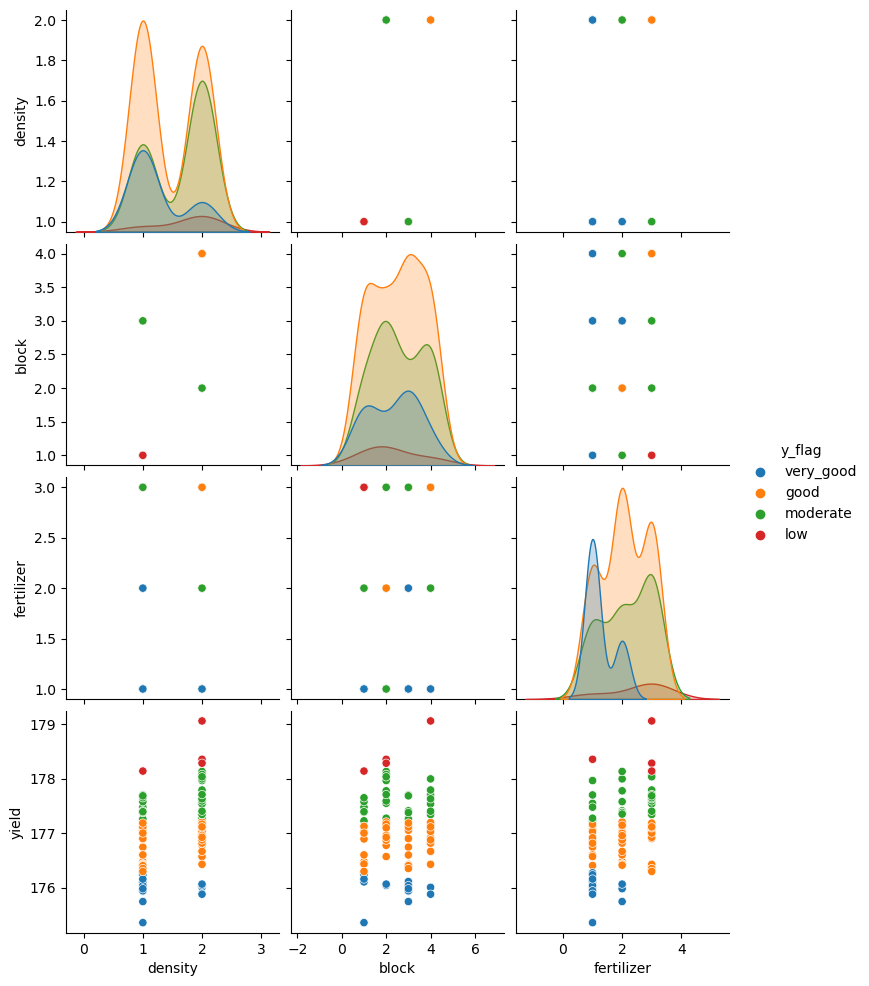

In [442]:
sns.pairplot(data=inp0,x_vars=["density","block","fertilizer"],  hue='y_flag' )

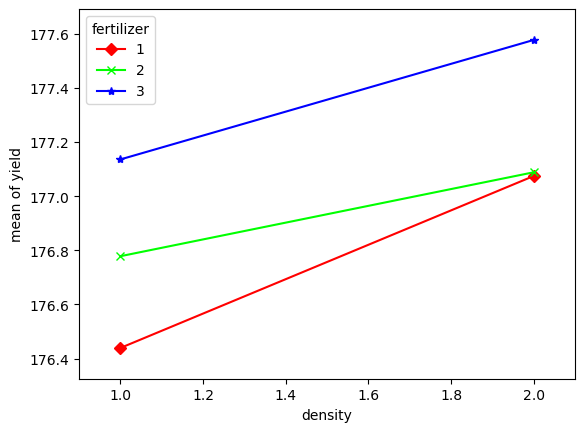

In [443]:
fig=interaction_plot(x= inp0.density,trace=inp0['fertilizer'], response= inp0['yield'], markers=['D', "x", "*"])

# we can see the fertilizer and density are having significance diffrene in some points

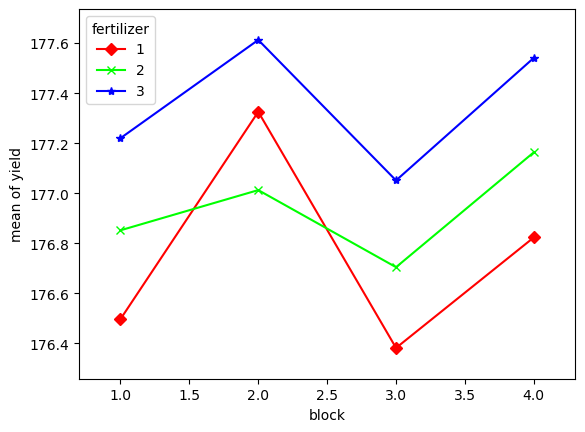

In [444]:
fig=interaction_plot(x= inp0.block,trace=inp0['fertilizer'], response= inp0['yield'], markers=['D', "x", "*"])

# we can see the fertilizer and block are having significance diffrene in some points

In [445]:
# ols('Completion_Time ~ C(Program) + C(Experience) + C(Program):C(Experience)', data=df).fit()

In [446]:
inp0.columns

Index(['density', 'block', 'fertilizer', 'yield', 'y_flag'], dtype='object')

In [447]:
inp0.rename(columns={'yield': 'Y'}, inplace=True)

In [471]:
mod_2=ols('Y ~ C(block) + C(fertilizer) +C(density) + C(block):C(fertilizer):C(density)', data=inp0[["block", "fertilizer", "Y", "density"]])
mod_2=mod_2.fit()

In [476]:
df=sm.stats.anova_lm(mod_2, type=2)

In [477]:
df

,df,sum_sq,mean_sq,F,PR(>F)
C(block),3.0,5.607820,1.869273,5.421336,0.001856
C(fertilizer),2.0,6.068047,3.034023,8.799388,0.000339
C(density),1.0,0.608166,0.608166,1.763826,0.187745
C(block):C(fertilizer):C(density),17.0,5.580443,0.328261,0.952036,0.518186
Residual,84.0,28.963147,0.344799,NaN,NaN


In [480]:
df["PR(>F)_flag"]=df["PR(>F)"].apply(lambda x: "Reject" if x<0.05 else "Accept")

In [481]:
df

,df,sum_sq,mean_sq,F,PR(>F),PR(>F)_flag
C(block),3.0,5.607820,1.869273,5.421336,0.001856,Reject
C(fertilizer),2.0,6.068047,3.034023,8.799388,0.000339,Reject
C(density),1.0,0.608166,0.608166,1.763826,0.187745,Accept
C(block):C(fertilizer):C(density),17.0,5.580443,0.328261,0.952036,0.518186,Accept
Residual,84.0,28.963147,0.344799,NaN,NaN,Accept


In [487]:
pf_df=pg.anova(dv='Y', between=["block", "fertilizer",  "density"], data=inp0[["block", "fertilizer", "density", "Y"]], detailed=True)

In [491]:
pf_df["Reject_accept"]=pf_df['p-unc'].apply(lambda x:"Reject" if x<0.05 else "Accept")
pf_df

,Source,SS,DF,MS,F,p-unc,np2,Reject_accept
0,block,1.311450e+01,3.0,4.371499e+00,1.267839e+01,6.120772e-04,3.116738e-01,Reject
1,fertilizer,7.760385e-12,2.0,3.880192e-12,1.125348e-11,1.000000e+00,2.679400e-13,Accept
2,density,4.371499e+00,1.0,4.371499e+00,1.267839e+01,6.120772e-04,1.311398e-01,Reject
3,block * fertilizer,3.536605e-01,6.0,5.894342e-02,1.709499e-01,9.157349e-01,1.206340e-02,Accept
4,block * density,3.008111e+06,3.0,1.002704e+06,2.908079e+06,1.502891e-210,9.999904e-01,Reject
5,fertilizer * density,1.781213e-01,2.0,8.906065e-02,2.582970e-01,7.729770e-01,6.112338e-03,Accept
6,block * fertilizer * density,7.205144e+00,6.0,1.200857e+00,3.482771e+00,4.007837e-03,1.992116e-01,Reject
7,Residual,2.896315e+01,84.0,3.447994e-01,NaN,NaN,NaN,Accept


# We need to reject the H0 as below groups are having p value less than 0.05

In [492]:
pf_df[pf_df["Reject_accept"]=="Reject"]

,Source,SS,DF,MS,F,p-unc,np2,Reject_accept
0,block,1.311450e+01,3.0,4.371499e+00,1.267839e+01,6.120772e-04,0.311674,Reject
2,density,4.371499e+00,1.0,4.371499e+00,1.267839e+01,6.120772e-04,0.131140,Reject
4,block * density,3.008111e+06,3.0,1.002704e+06,2.908079e+06,1.502891e-210,0.999990,Reject
6,block * fertilizer * density,7.205144e+00,6.0,1.200857e+00,3.482771e+00,4.007837e-03,0.199212,Reject
